In [47]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import random
from math import exp

In [3]:
Train = pd.read_json("/Users/xj5/Desktop/DataMining/train.json")
Test = pd.read_json("/Users/xj5/Desktop/DataMining/test.json/test.json")

In [6]:
Train[:3]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street


In [42]:
X = Train[['bathrooms','bedrooms','latitude','longitude','price','listing_id']]

In [43]:
X[:3]

,bathrooms,bedrooms,latitude,longitude,price,listing_id
10,1.5,3,40.7145,-73.9425,3000,7211212
10000,1.0,2,40.7947,-73.9667,5465,7150865
100004,1.0,1,40.7388,-74.0018,2850,6887163


In [44]:
Y = Train[['interest_level']]

In [45]:
Y[:3]

,interest_level
10,medium
10000,low
100004,high


In [48]:
%pylab inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image
import pydotplus

Populating the interactive namespace from numpy and matplotlib


/Users/xj5/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['exp', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [65]:
width = X.ix[:,0:6].as_matrix()

In [66]:
lex = preprocessing.LabelEncoder()
nw = lex.fit_transform(width[0])

In [67]:
for i in width[1:]:
    nw = np.vstack([nw, lex.fit_transform(i)])

In [68]:
X_encoder = pd.DataFrame(nw, columns=X.columns[0:6])

In [69]:
X_encoder[:3]

,bathrooms,bedrooms,latitude,longitude,price,listing_id
0,1,2,3,0,4,5
1,1,2,3,0,4,5
2,1,1,2,0,3,4


In [70]:
ley = preprocessing.LabelEncoder()
Y_encoder = ley.fit_transform(Y, )

/Users/xj5/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_encoder, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [72]:
from IPython.display import Image
import pydotplus
with open("tree_image.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f,
                            feature_names=X_encoder.columns, 
                            class_names=['low', 'medium', 'high'], 
                            filled=True, rounded=True)

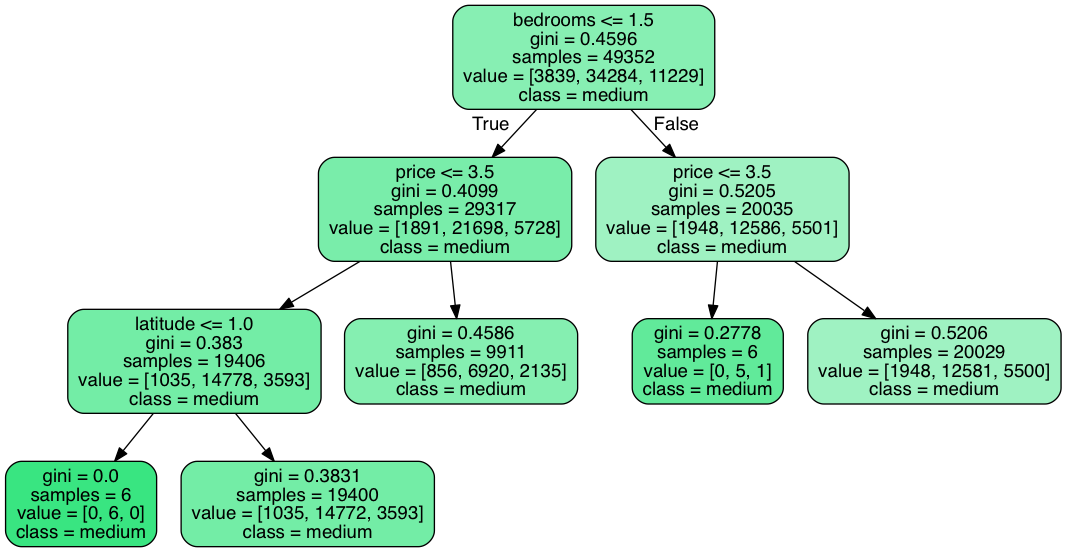

In [73]:
graph = pydotplus.graph_from_dot_data(open('tree_image.dot').read()) 
Image(graph.create_png())

In [60]:
Test[:3]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street


In [74]:
X_test = Test[['bathrooms','bedrooms','latitude','longitude','price', 'listing_id']]
# Y_test = Test[['interest_level']]
X_test[:2]

,bathrooms,bedrooms,latitude,longitude,price,listing_id
0,1.0,1,40.7185,-73.9865,2950,7142618
1,1.0,2,40.7278,-74.0000,2850,7210040


In [62]:
width = X.ix[:,0:6].as_matrix()
lex = preprocessing.LabelEncoder()
nw = lex.fit_transform(width[0])
for i in width[1:]:
    nw = np.vstack([nw, lex.fit_transform(i)])
X_test_encoder = pd.DataFrame(nw, columns=X.columns[0:6])

In [64]:
X_test_encoder[:2]

,bathrooms,bedrooms,latitude,longitude,price
0,1,2,3,0,4
1,1,2,3,0,4


In [79]:
Y_test_pred = clf.predict(X_test)
Y_test_pred_proba = clf.predict_proba(X_test)
# Y_test_pred_proba = Y_test_pred_proba[:,0]

In [80]:
labels2idx = {label: i for i, label in enumerate(clf.classes_)}
labels2idx

{'high': 0, 'low': 1, 'medium': 2}

In [81]:
sub = pd.DataFrame()
sub["listing_id"] = X_test["listing_id"]
for label in ["high", "medium", "low"]:
    sub[label] = Y_test_pred_proba[:, labels2idx[label]]
sub.to_csv("submission.csv", index=False)